## Data Dictionary<br>
#### This data contains information about U.S. bank and we have to predict using machine learning model whether the customer is likely to leave the bank.
<br> 
<li> <b>RowNumber</b>: Index</li>
<li> <b>CustomerId</b>: shows the customer id</li>
<li> <b>Surname</b>: name</li>
<li> <b>CreditScore</b>: shows credit score</li>
<li> <b>Geography</b>: location of the customer(categorical)</li>
<li> <b>Gender</b>: gender(categorical)</li>
<li> <b>Age</b>: age(ordinal)</li>
<li> <b>Tenure</b>: tenure(ordinal)</li>
<li> <b>Balance</b>: balance in the account</li>
<li> <b>NumOfProducts</b>: number of products used by customer</li>
<li> <b>HasCrCard</b>: has credit card or not(boolean)</li>
<li> <b>IsActiveMember</b>: is active member or not(boolean)</li>
<li> <b>EstimatedSalary</b>: salary estimated(boolean)</li>
<li> <b>Exited</b>: exited or not(boolean)</li>

### Importing libraries

In [218]:
import numpy as np #for linear algebra 
import pandas as pd #for importing dataframes and datasets
import matplotlib.pyplot as plt #for ploting visualisations
import seaborn as sns #for graphs visualisation

In [219]:
#import data
bank=pd.read_csv('Churn_Modelling.csv')

### Exploratory Data Analysis

In [220]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [221]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [222]:
bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Data Visualisations

<Axes: xlabel='Exited', ylabel='count'>

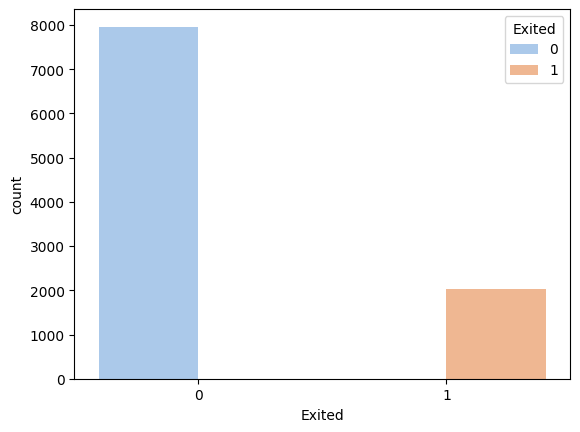

In [223]:
sns.countplot(x='Exited', data=bank, hue='Exited', palette='pastel')

<Axes: xlabel='IsActiveMember', ylabel='count'>

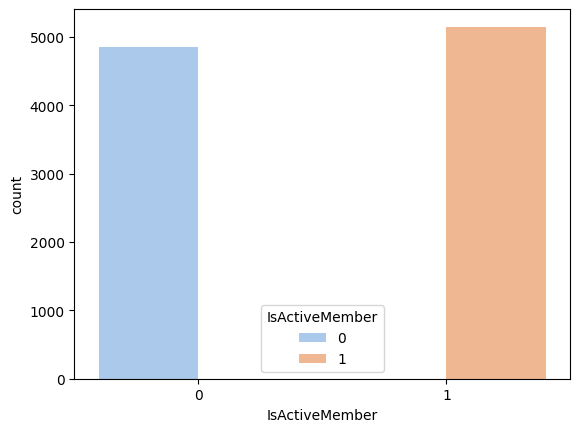

In [224]:
sns.countplot(x='IsActiveMember', data=bank, hue='IsActiveMember', palette='pastel')

<Axes: xlabel='IsActiveMember', ylabel='Exited'>

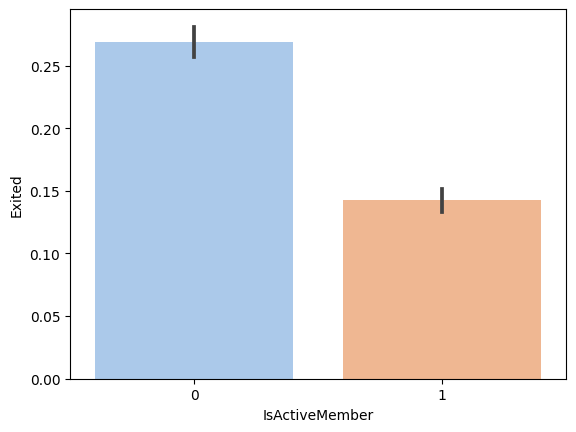

In [225]:
sns.barplot(x='IsActiveMember', y='Exited', data=bank, palette='pastel')

<Axes: xlabel='HasCrCard', ylabel='Exited'>

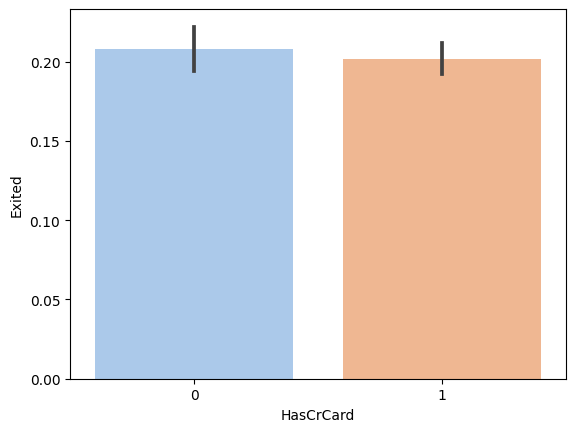

In [226]:
sns.barplot(x='HasCrCard', y='Exited', data=bank, palette='pastel')

<Axes: xlabel='Gender', ylabel='Exited'>

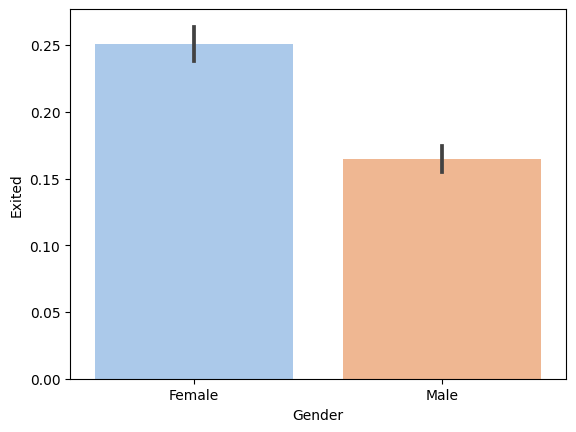

In [227]:
sns.barplot(x='Gender', y='Exited', data=bank, palette='pastel')

<Axes: xlabel='Tenure', ylabel='Exited'>

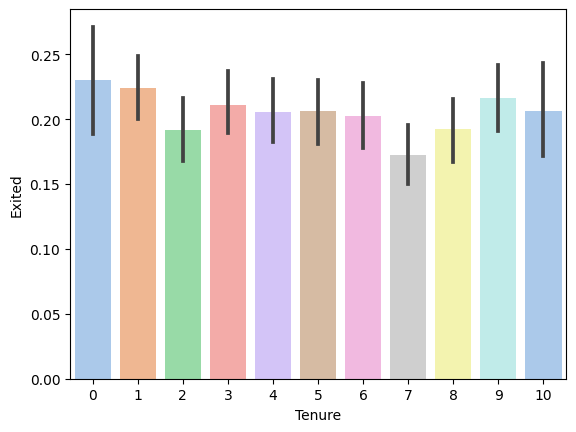

In [228]:
sns.barplot(x='Tenure', y='Exited', data=bank, palette='pastel')

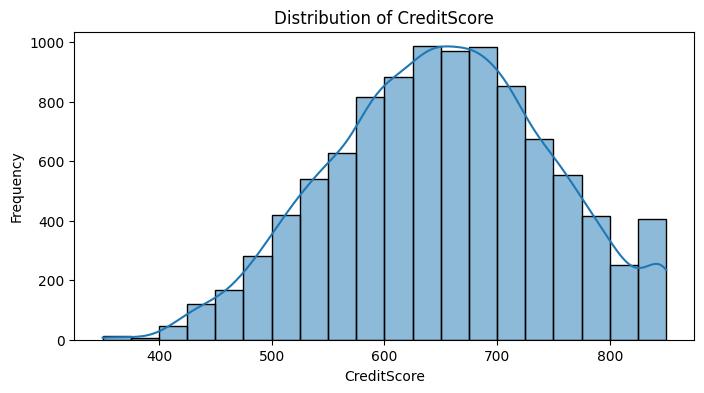

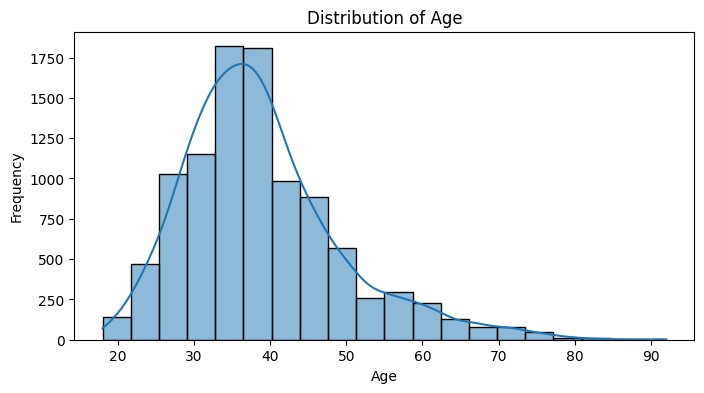

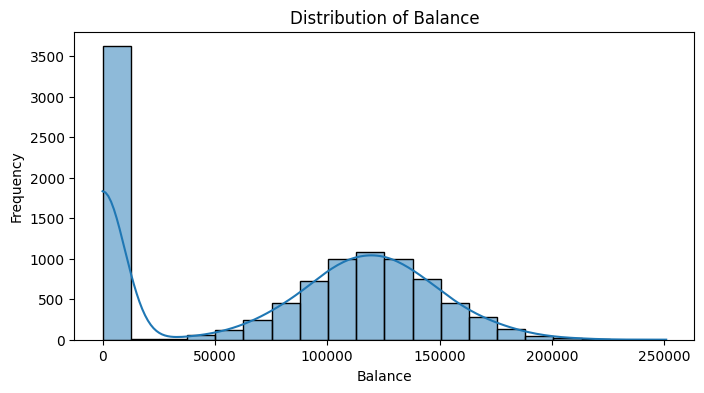

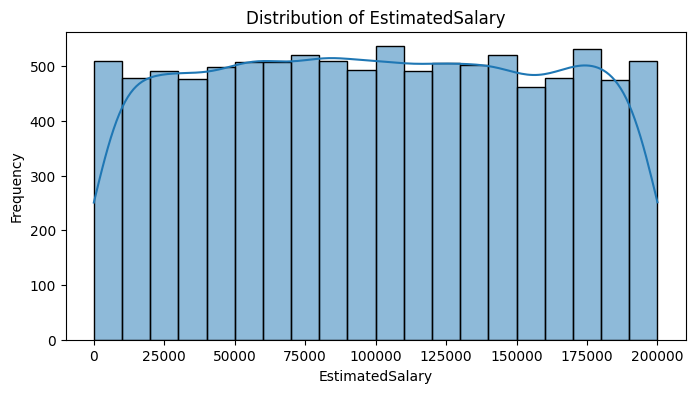

In [229]:
col_dis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for col in col_dis:
    plt.figure(figsize=(8, 4))
    sns.histplot(bank[col], bins = 20, kde = True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()          

In [230]:
bank.drop_duplicates(inplace=True)

In [231]:
#drop unnecessary data
bank.drop(['CustomerId','RowNumber','Surname',],inplace=True, axis=1)

In [232]:
bank['Gender']=pd.get_dummies(bank['Gender'],drop_first=True)
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,False,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,False,41,1,83807.86,1,0,1,112542.58,0
2,502,France,False,42,8,159660.80,3,1,0,113931.57,1
3,699,France,False,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,False,43,2,125510.82,1,1,1,79084.10,0


In [233]:
country=pd.get_dummies(bank['Geography'],drop_first=True)
country.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [234]:
bank=pd.concat([bank,country], axis=1, join='inner')

In [235]:
bank.drop(['Geography'], axis=1, inplace=True)

In [236]:
bank.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,False,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,False,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,False,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,False,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,False,43,2,125510.82,1,1,1,79084.10,0,False,True


### Data Splitting

In [237]:
x=bank.drop(['Exited'],  axis=1)
y=bank['Exited']

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state=45)

In [240]:
x_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
8609,678,True,40,1,0.00,2,1,1,187343.40,False,False
8446,691,False,33,6,0.00,2,1,0,164074.89,False,False
5480,765,False,34,8,136729.51,2,0,0,47058.21,True,False
9632,760,False,34,6,58003.41,1,1,0,90346.10,True,False
9927,814,False,31,6,87772.52,1,1,0,188516.45,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8772,768,True,30,6,0.00,2,1,1,199454.37,False,False
163,721,False,36,2,0.00,2,1,1,106977.80,False,True
6012,738,False,26,3,0.00,2,1,0,67484.16,False,False
6558,686,True,38,0,138131.34,1,0,1,115927.85,False,False


In [241]:
y_train

8609    0
8446    0
5480    0
9632    0
9927    0
       ..
8772    0
163     0
6012    0
6558    0
7115    0
Name: Exited, Length: 6700, dtype: int64

In [242]:
y_test

4132    0
6553    1
7604    1
585     1
5924    0
       ..
7783    1
5151    0
3308    0
2586    0
8178    0
Name: Exited, Length: 3300, dtype: int64

### Training the Model

In [243]:
from sklearn.linear_model import LogisticRegression
logR= LogisticRegression()

**1.)Logistic Regression**

In [244]:
logR.fit(x_train, y_train)

LogisticRegression()

In [245]:
pred=logR.predict(x_test)

In [246]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [247]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.2f}')
print('Training Score:',logR.score(x_train,y_train))
print('Testing Score:',logR.score(x_test,y_test))

Accuracy: 0.79
Training Score: 0.7919402985074627
Testing Score: 0.7887878787878788


**2.)Random Forest Classifier**

In [248]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)

In [249]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.2f}')
print('Training Score:',rfc.score(x_train,y_train))
print('Testing Score:',rfc.score(x_test,y_test))

Accuracy: 0.86
Training Score: 0.9997014925373134
Testing Score: 0.8557575757575757


**3.)Gradient Boosting Classifier**

In [250]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred = gbc.predict(x_test)

In [251]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.2f}')
print('Training Score:',gbc.score(x_train,y_train))
print('Testing Score:',gbc.score(x_test,y_test))

Accuracy: 0.86
Training Score: 0.8782089552238806
Testing Score: 0.8624242424242424


from above code we can conclude that **`Random Forest Classifier`** works best for this model.